In [ ]:
import tensorflow as tf
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
#from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train.shape, x_test.shape

#x_train, y_train = x_train[:10000]

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
x_train, y_train = x_train[:12000], y_train[:12000]

In [ ]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
x_train.shape, y_train.shape

((12000, 32, 32, 3), (12000, 1))

In [ ]:
model = Sequential()
model.add(Conv2D(32, 3, activation='relu', padding = 'same', input_shape = x_train.shape[1:]))  # 필터 32개, 필터 크기 3
model.add(Conv2D(32, 3, padding='same', activation='relu'))  # 이미지 크기 똑같이. padding = 'same'
model.add(MaxPooling2D())  # default 2 x 2, 이미지 크기 절반.
model.add(Dropout(0.25))

# 추가한 코드
model.add(Conv2D(64, 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(64, 3, padding = 'same', activation = 'relu'))
#model.add(GlobalAveragePooling2D())  # FC 없애려고 도입.
model.add(Dropout(0.25))


model.add(Conv2D(128, 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(128, 3, padding = 'same', activation = 'relu'))
#model.add(GlobalAveragePooling2D())  # FC 없애려고 도입.
model.add(Dropout(0.25))

# 추가한 코드
model.add(Conv2D(256, 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(256, 3, padding = 'same', activation = 'relu'))
#model.add(GlobalAveragePooling2D())  # FC 없애려고 도입.
model.add(Dropout(0.25))

# 추가한 코드
model.add(Conv2D(512, 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(512, 3, padding = 'same', activation = 'relu'))
#model.add(GlobalAveragePooling2D())  # FC 없애려고 도입.
model.add(Dropout(0.25))

#1.Pooling
#model.add(MaxPooling2D(pool_size=(2, 2)))
#2. BatchNormalization
#model.add(BatchNormalization())
#3. dropout
#model.add(Dropout(0.3))


model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(256, activation = 'relu'))
#model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_75 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_76 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_60 (Dropout)                 │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_77 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_78 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_61 (Dropout)                 │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_79 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_80 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_62 (Dropout)                 │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_81 (Conv2D)                   │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_82 (Conv2D)                   │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_63 (Dropout)                 │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_83 (Conv2D)                   │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_84 (Conv2D)                   │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_64 (Dropout)                 │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 16, 16, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 512)                 │      67,109,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_65 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 10)                  │           5,1

 Total params: 71,828,778 (274.01 MB)

 Trainable params: 71,827,754 (274.00 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # categorical_crossentropy

In [ ]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 46ms/step - accuracy: 0.1079 - loss: 5.0561
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.1020 - loss: 2.3037
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 47ms/step - accuracy: 0.1045 - loss: 2.3037
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - accuracy: 0.1036 - loss: 2.3261
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - accuracy: 0.1032 - loss: 2.3026
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.0991 - loss: 2.3024
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.0987 - loss: 2.3025
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.1009 - loss: 2.3027
Epoch 9/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.1015 - loss: 2.3024
Epoch 10/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.1015 - loss: 2.3024
Epoch 11/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.0965 - loss: 2.3026
Epoch 12/30
375/375 ━━━━━━━━━━

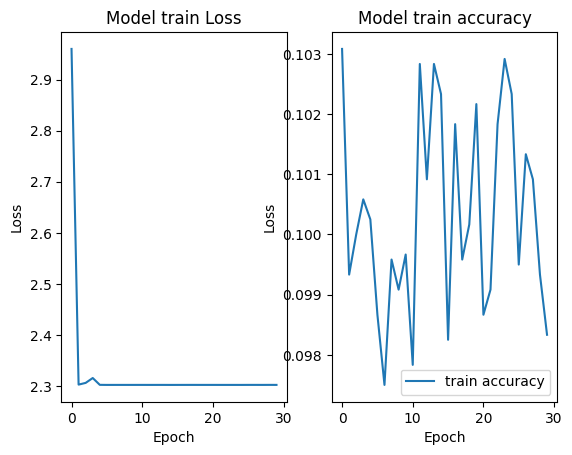

In [ ]:
plt.subplot(121)
plt.plot(history.history['loss'], label='train loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model train Loss')

plt.subplot(122)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model train accuracy')

plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("test_acuuracy: ", test_acc)

313/313 - 5s - 15ms/step - accuracy: 0.1000 - loss: 2.3029
test_acuuracy:  0.10000000149011612
